<a href="https://colab.research.google.com/github/hundareshivani/LGMVIP-DataScienceTask/blob/main/Prediction_using_Decision_Tree_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LET'S GROW MORE**

##**TASK 2 : Prediction using Decision Tree  Algorithm**

###**AUTHOR : SHIVANI HUNDARE**

#**IMPORTING LIBRARIES**


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import seaborn as sns
%matplotlib inline

#**DATASET**

In [34]:
data = pd.read_csv('/content/Iris.csv',index_col=0)
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [35]:
data.shape

(150, 5)

#**DESCRIPTION OF DATA**

In [36]:
data.describe(include="all")


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#**CHECKING DATATYPE OF EACH COLUMN**

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#**TO CHECK NULL VALUES**

In [38]:
data.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#**DATA COUNTS**

In [39]:
data['Species'].value_counts()


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#**USING LabelEncoder**


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

###*I have used **LabelEncoder** to convert categorical value into numeric value*

In [41]:
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


#**SPLITING DATA INTO TRAINING AND TEST SET**

In [42]:
X=data.drop(["Species"],axis=1)
y=data["Species"]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#**DECISION TREE**

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#**TO PREDICT AND EVALUATE DECISION TREE**

In [46]:
prediction=dtree.predict(X_test)


In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [48]:
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [49]:
print(confusion_matrix(y_test,prediction))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [50]:
print(accuracy_score(y_test,prediction)*100,"%")


100.0 %


######*ACCURACY IS 100%*

#**TREE VISUALIZATION**

[Text(446.4, 498.3, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(377.7230769230769, 407.70000000000005, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(515.0769230769231, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(274.7076923076923, 317.1, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(137.35384615384615, 226.5, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(68.67692307692307, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(206.03076923076924, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(480.73846153846154, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(412.0615384615385, 45.2999

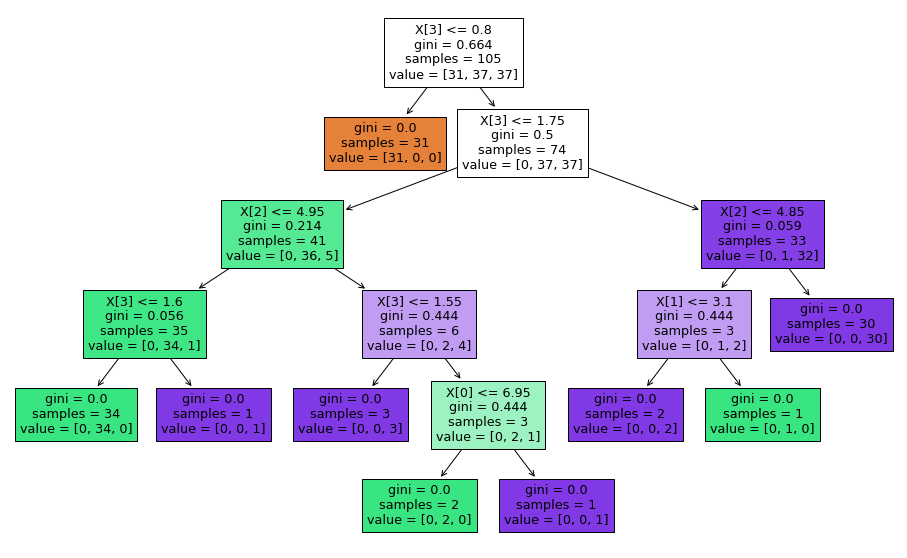

In [51]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dtree,filled=True)

#**THANKYOU**